In [34]:
import pandas as pd
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Input
from keras.models import Model
import time
from IPython import display
import math
import time

In [16]:
def get_y(x):
    return x*x

def sample_data(n, num_points):
    x = (np.random.random_sample((num_points,))-0.5)*10
    x = np.sort(x).tolist()
    a = np.random.uniform(-10, 10)
    b = np.random.uniform(-1, 1)
    c = np.random.uniform(-10, 10)
    y = []
    for i in range(0,num_points):
        y.append(x[i]**2 + c)
    combined = x+y
    data = np.array([combined])
    for i in range(n-1):
        c = np.random.uniform(-10, 10)
        x = (np.random.random_sample((num_points,))-0.5)*10
        x = np.sort(x).tolist()
        y = []
        for i in range(0,num_points):
#             yi = a*x[i]**2 + b*x[i] + c 
#             yi = x[i]**2
            y.append(x[i]**2 + c)
#             data.append([x[i], yi])
        combined = x + y
        data = np.vstack((data, combined))
    return data


def pi_sample_data(n, f):
    data = []
    for i in range(n):
        x = np.random.uniform(0, 1)
        data.append([x, math.sin(x*np.pi*f) + np.random.uniform(0,1)])
    return np.array(data)
    

def sample_z(m, n):
    seed = np.random.uniform(-1., 1., size=[m, n])
    seed = np.sort(seed)
    return seed

0.07480259736378987
Iterations: 0	 Discriminator loss: 0.7085	 Generator loss: 0.6380


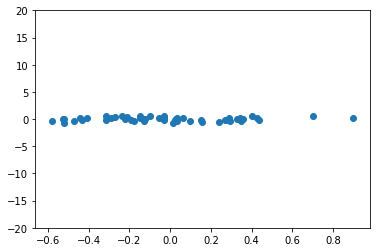

5.646193532148997
Iterations: 4000	 Discriminator loss: 0.5884	 Generator loss: 1.5041


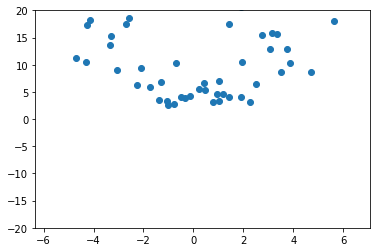

In [35]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'
tf.reset_default_graph()
start = time.time()
num_points = 50
gen_input_size = 200
optimizer = Adam(0.0002, 0.5)
batch_size = 256
epochs = 4001
steps_per_epoch = 1
def generator():
    generator = Sequential()
    
    generator.add(Dense(1000, input_dim=gen_input_size))
    generator.add(LeakyReLU(0.2))
    
#     generator.add(Dense(200))
#     generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(num_points*2))
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)

    return generator

def discriminator():
    discriminator = Sequential()
    
    discriminator.add(Dense(1000, input_dim=num_points*2))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(1, activation='sigmoid'))
    
    discriminator.compile(loss = 'binary_crossentropy', optimizer=optimizer)
    
    return discriminator

discriminator = discriminator()
generator = generator()

discriminator.trainable = False

gan_input = Input(shape=(gen_input_size,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output)

gan.compile(loss='binary_crossentropy', optimizer=optimizer)

for epoch in range(epochs):
    for steps in range(steps_per_epoch):
        noise = sample_z(batch_size, gen_input_size)
        fake_x = generator.predict(noise)
        real_x = sample_data(n=batch_size, num_points=num_points)
        x = np.concatenate((real_x, fake_x))
        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9
        d_loss = discriminator.train_on_batch(x, disc_y)
        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)
        
    if epoch%4000 == 0:
        print((time.time()-start)/60)
        print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(epoch,d_loss,g_loss))
        g_plot = generator.predict(sample_z(batch_size, gen_input_size))
        x_ = []
        y_ = []
        for i in range(0, int(g_plot.shape[1]/2)):
            x_.append(g_plot[0,i])

        for i in range(int(g_plot.shape[1]/2), int(g_plot.shape[1])):
            y_.append(g_plot[0,i])

        plt.ylim(-20.0, 20)
        plt.scatter(x_, y_)
        plt.show()
        start = time.time()
        


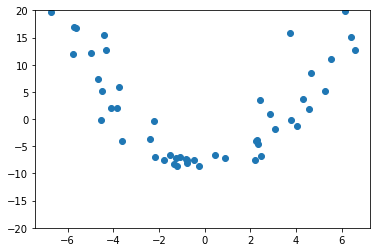

In [33]:
g_plot = generator.predict(sample_z(batch_size, gen_input_size))
x_ = []
y_ = []
for i in range(0, int(g_plot.shape[1]/2)):
    x_.append(g_plot[0,i])

for i in range(int(g_plot.shape[1]/2), int(g_plot.shape[1])):
    y_.append(g_plot[0,i])

plt.ylim(-20.0, 20)
plt.scatter(x_, y_)
plt.show()